In [149]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns
# retina display from config
plt.rcParams['figure.dpi'] = 300

In [3]:
os.getcwd()

'/Users/joaomatos/Documents/ehrmonize/experiments'

In [84]:
mimic_files = [f for f in os.listdir("metrics/experiments1/") if f.endswith("MIMIC-IV.csv")]
eicu_files = [f for f in os.listdir("metrics/experiments1/") if f.endswith("eICU-CRD.csv")]

df_mimic = pd.concat([pd.read_csv("metrics/experiments1/" + f).assign(source_file=f) for f in mimic_files])
df_eicu = pd.concat([pd.read_csv("metrics/experiments1/" + f).assign(source_file=f) for f in eicu_files])

# combine the two datasets
df = pd.concat([df_mimic, df_eicu])

# transform the 'source_file' to remove the .csv and the suffix 'MIMMIC-IV' or 'eICU-CRD'
df['source_file'] = df['source_file'].str.replace('.csv', '')
df['source_file'] = df['source_file'].str.replace('_MIMIC-IV', '')
df['source_file'] = df['source_file'].str.replace('_eICU-CRD', '')

# fill na with 0
df = df.fillna(0)


In [85]:
df

,db,model_id,temperature,n_shots,n_attempts,agentic,elapsed_time,consistencies,accuracy_score,precision_score,recall_score,f1_score,specificity_score,balanced_accuracy_score,source_file
0,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.0,0,1,False,61.072,0.0,0.766,0.324,1.000,0.489,0.737,0.869,one_hot_iv_fluid
1,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,0,1,False,52.214,0.0,0.756,0.314,1.000,0.478,0.726,0.863,one_hot_iv_fluid
2,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.5,0,1,False,54.273,0.0,0.772,0.328,1.000,0.494,0.743,0.871,one_hot_iv_fluid
3,MIMIC-IV,anthropic.claude-v2:1,0.0,0,1,False,106.122,0.0,0.797,0.339,0.864,0.487,0.789,0.826,one_hot_iv_fluid
4,MIMIC-IV,anthropic.claude-v2:1,0.2,0,1,False,98.937,0.0,0.807,0.352,0.864,0.500,0.800,0.832,one_hot_iv_fluid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,eICU-CRD,gpt-3.5-turbo,0.2,0,1,False,91.910,0.0,0.665,0.000,0.000,0.000,0.000,0.000,get_generic_name
11,eICU-CRD,gpt-3.5-turbo,0.5,0,1,False,92.901,0.0,0.620,0.000,0.000,0.000,0.000,0.000,get_generic_name
12,eICU-CRD,gpt-4o,0.0,0,1,False,98.676,0.0,0.720,0.000,0.000,0.000,0.000,0.000,get_generic_name
13,eICU-CRD,gpt-4o,0.2,0,1,False,106.267,0.0,0.720,0.000,0.000,0.000,0.000,0.000,get_generic_name


In [86]:
# create a new df that averages the metrics for the same model, temperature, task for both datasets
# and the 'db' becomes 'both'

df = df.groupby(['model_id', 'temperature', 'source_file'])[['f1_score','accuracy_score']].mean().reset_index()

In [87]:
# combine the f1 score and accuracy score into one column
# keep accuracy score if 'source_file' starts with 'get_'
df['f1_score'] = np.where(df['source_file'].str.startswith('get_'), df['accuracy_score'], df['f1_score'])


In [89]:
df.source_file.nunique()

8

In [90]:
df.model_id.value_counts()

model_id
anthropic.claude-v2:1                 24
gpt-3.5-turbo                         24
gpt-4o                                24
meta.llama3-70b-instruct-v1:0         24
mistral.mixtral-8x7b-instruct-v0:1    24
Name: count, dtype: int64

In [91]:
task_names = {
    "one_hot_antibiotic": "Antibiotic",
    "one_hot_anticoagulant": "Anticoagulant",
    "one_hot_electrolytes": "Electrolytes",
    "one_hot_iv_fluid": "Intravenous Fluid",
    "one_hot_opioid_analgesic": "Opioid Analgesic",
    "one_hot_stress_ulcer_prophylaxis": "Stress Ulcer Prophylaxis",
    "get_generic_name": "Drug Generic Name",
    "get_generic_route": "Route Generic Name",
}

In [92]:
model_names = {
    "meta.llama3-70b-instruct-v1:0": "Llama3",
    "anthropic.claude-v2:1": "Claude2",
    "mistral.mixtral-8x7b-instruct-v0:1": "Mixtral8x7B",
    "gpt-3.5-turbo": "GPT-3.5",
    "gpt-4o": "GPT-4o",
}

In [93]:
df

,model_id,temperature,source_file,f1_score,accuracy_score
0,anthropic.claude-v2:1,0.0,get_generic_name,0.6925,0.6925
1,anthropic.claude-v2:1,0.0,get_generic_route,0.6175,0.6175
2,anthropic.claude-v2:1,0.0,one_hot_antibiotic,0.5580,0.9750
3,anthropic.claude-v2:1,0.0,one_hot_anticoagulant,0.0000,0.9495
4,anthropic.claude-v2:1,0.0,one_hot_electrolytes,0.4490,0.8400
...,...,...,...,...,...
115,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_anticoagulant,0.8535,0.9850
116,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_electrolytes,0.6860,0.9025
117,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_iv_fluid,0.4255,0.6580
118,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_opioid_analgesic,0.8455,0.9725


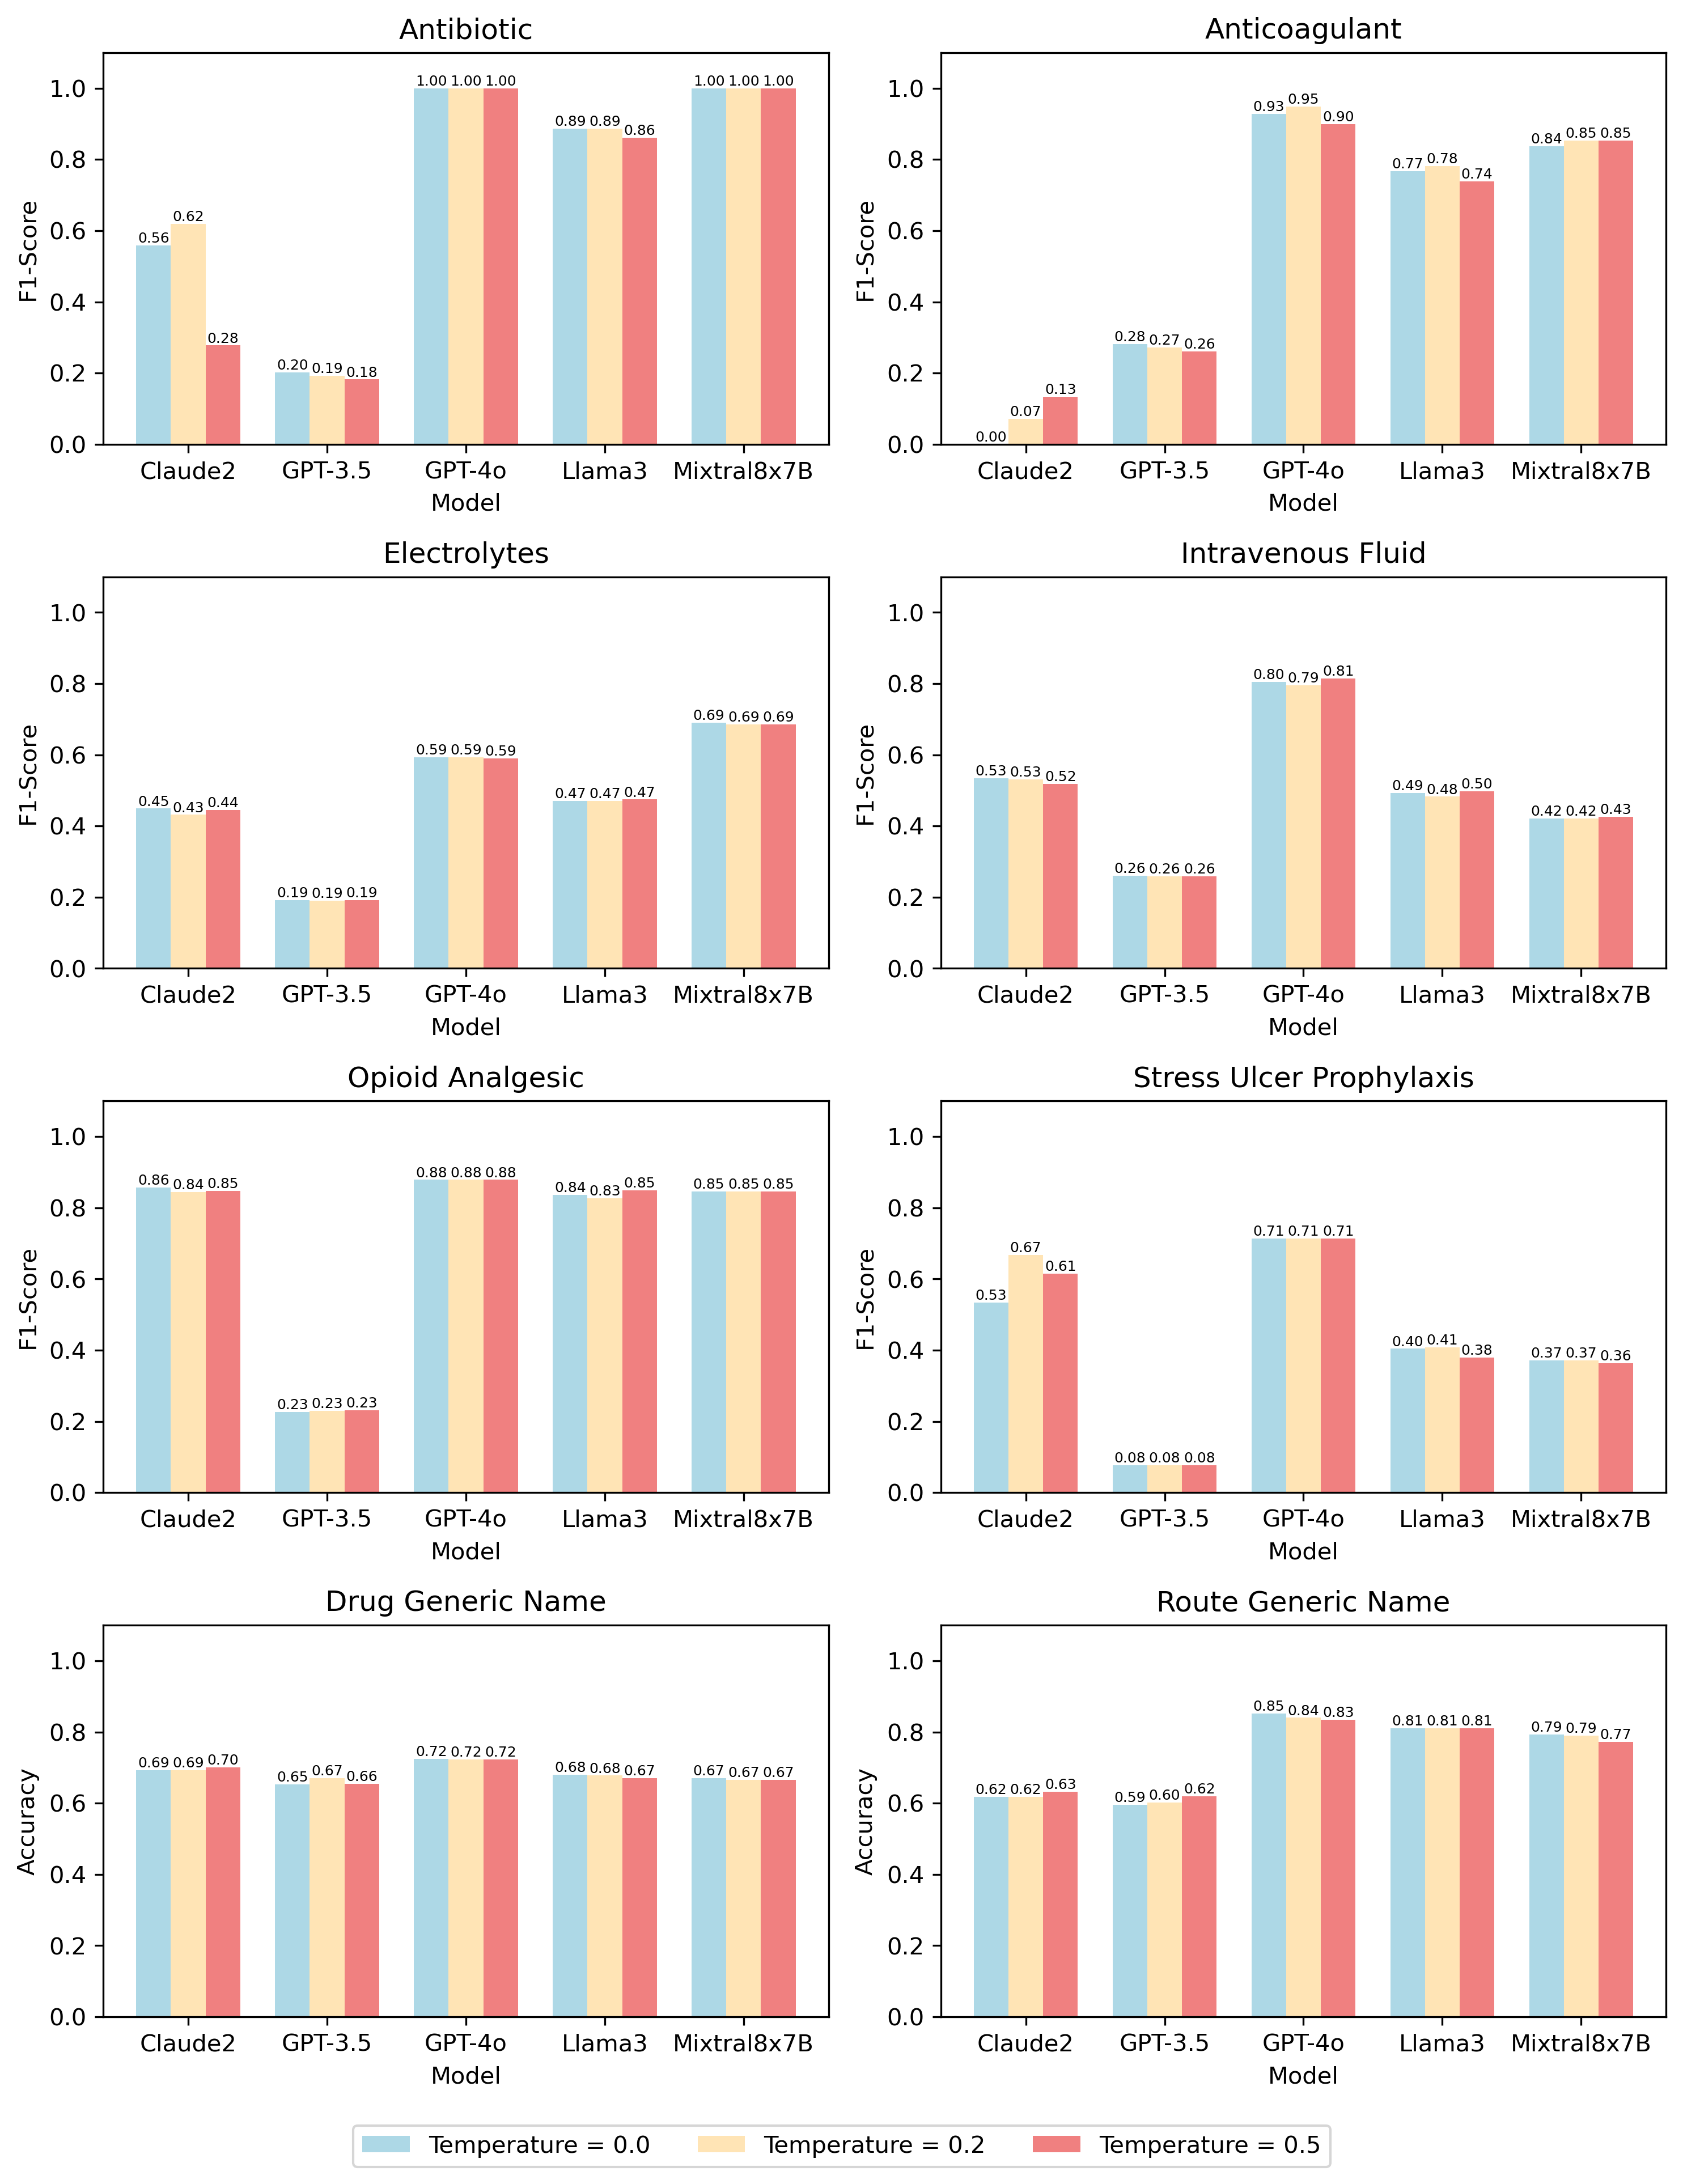

In [94]:
# Unique temperatures and colors
temperatures = df.temperature.unique()
colors = ['lightblue', 'moccasin', 'lightcoral', ]  # Adding a third color

# Create a 4x2 grid of plots
fig, axs = plt.subplots(4, 2, figsize=(10, 13))

# Keep track of handles and labels for the legend
handles = []
labels = []

for i, (file, name) in enumerate(task_names.items()):
    ax = axs[i // 2, i % 2]

    # Filter and pivot the DataFrame
    filtered_df = df[df.source_file == file]
    pivot_df = filtered_df.pivot(index='model_id', columns='temperature', values='f1_score')
    
    # Replace model_ids with proper names
    pivot_df.index = pivot_df.index.map(model_names)
    
    # Plotting each model_id with its temperatures side by side
    model_ids = pivot_df.index
    bar_width = 0.25  # Adjusting bar width for three bars
    x = np.arange(len(model_ids))  # the label locations

    for j, temp in enumerate(temperatures):
        bars = ax.bar(x + j * bar_width, pivot_df[temp], bar_width, label=f'Temperature {temp}', color=colors[j])
        if i == 0:  # Only need to add the legend items once
            handles.append(bars[0])
            labels.append(f'Temperature = {temp}')
        
        # Add text labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=6
            )

    # Setting titles and labels
    ax.set_title(name)
    ax.set_xlabel("Model")
    # if source_file starts with 'get_', then the y-axis label is 'Accuracy'
    ax.set_ylabel("Accuracy" if file.startswith('get_') else "F1-Score")
    ax.set_xticks(x + bar_width)  # Positioning the xticks properly for three bars
    ax.set_xticklabels(model_ids, rotation=0)
    ax.set_ylim(0, 1.1)  # Limiting y-axis from 0 to 1.1

# Add a single legend outside the plots
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)  # Adjust ncol for three items

# Adding a title to the entire figure
# fig.suptitle("One-Hot Encoded Medication Classification Performance", y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make space for the legend
plt.show()

# Save the plot
fig.savefig("plots/figure2.png", bbox_inches="tight")


In [202]:
files = ['one_hot_electrolytes_eICU-CRD.csv',
         'one_hot_iv_fluid_eICU-CRD.csv',
         'one_hot_opioid_analgesic_eICU-CRD.csv',
         'one_hot_stress_ulcer_prophylaxis_eICU-CRD.csv',
         'one_hot_antibiotic_MIMIC-IV.csv',
         'one_hot_anticoagulant_MIMIC-IV.csv',
        #  'get_generic_name_eICU-CRD.csv',
         'get_generic_route_eICU-CRD.csv',
         ]

# read the files
df = pd.concat([pd.read_csv("metrics/experiments2/" + f).assign(source_file=f) for f in files])

df['source_file'] = df['source_file'].str.replace('.csv', '')
df['source_file'] = df['source_file'].str.replace('_MIMIC-IV', '')
df['source_file'] = df['source_file'].str.replace('_eICU-CRD', '')

# Define task names for the legend
task_names = {
    "one_hot_antibiotic": "Antibiotic",
    "one_hot_anticoagulant": "Anticoagulant",
    "one_hot_electrolytes": "Electrolytes",
    "one_hot_iv_fluid": "Intravenous Fluid",
    "one_hot_opioid_analgesic": "Opioid Analgesic",
    "one_hot_stress_ulcer_prophylaxis": "Stress Ulcer Prophylaxis",
    "get_generic_name": "Drug Generic Name",
    "get_generic_route": "Route Generic Name",
}

# Add a new column 'task' with mapped task names
df['task'] = df['source_file'].map(task_names)

In [203]:
# df[['db','n_shots','n_attempts','f1_score','accuracy_score','task']]

# df1 = df.replace('Electrolytes', 'Antibiotic')
# df1 = df.replace('one_hot_electrolytes', 'one_hot_antibiotic')
# df1 = df.replace('Intravenous Fluid', 'Anticoagulant')
# df1 = df.replace('one_hot_iv_fluid', 'one_hot_anticoagulant')

# df2 = df.replace('Electrolytes', 'Opioid Analgesic')
# df2 = df.replace('one_hot_electrolytes', 'one_hot_opioid_analgesic')
# df2 = df.replace('Intravenous Fluid', 'Stress Ulcer Prophylaxis')
# df2 = df.replace('one_hot_iv_fluid', 'one_hot_stress_ulcer_prophylaxis')

# df3 = df.replace('Electrolytes', 'Drug Generic Name')
# df3 = df.replace('one_hot_electrolytes', 'get_generic_name')
# df3 = df.replace('Intravenous Fluid', 'Route Generic Name')
# df3 = df.replace('one_hot_iv_fluid', 'get_generic_route')

# all_df = pd.concat([df, df1, df2, df3])

# all_df


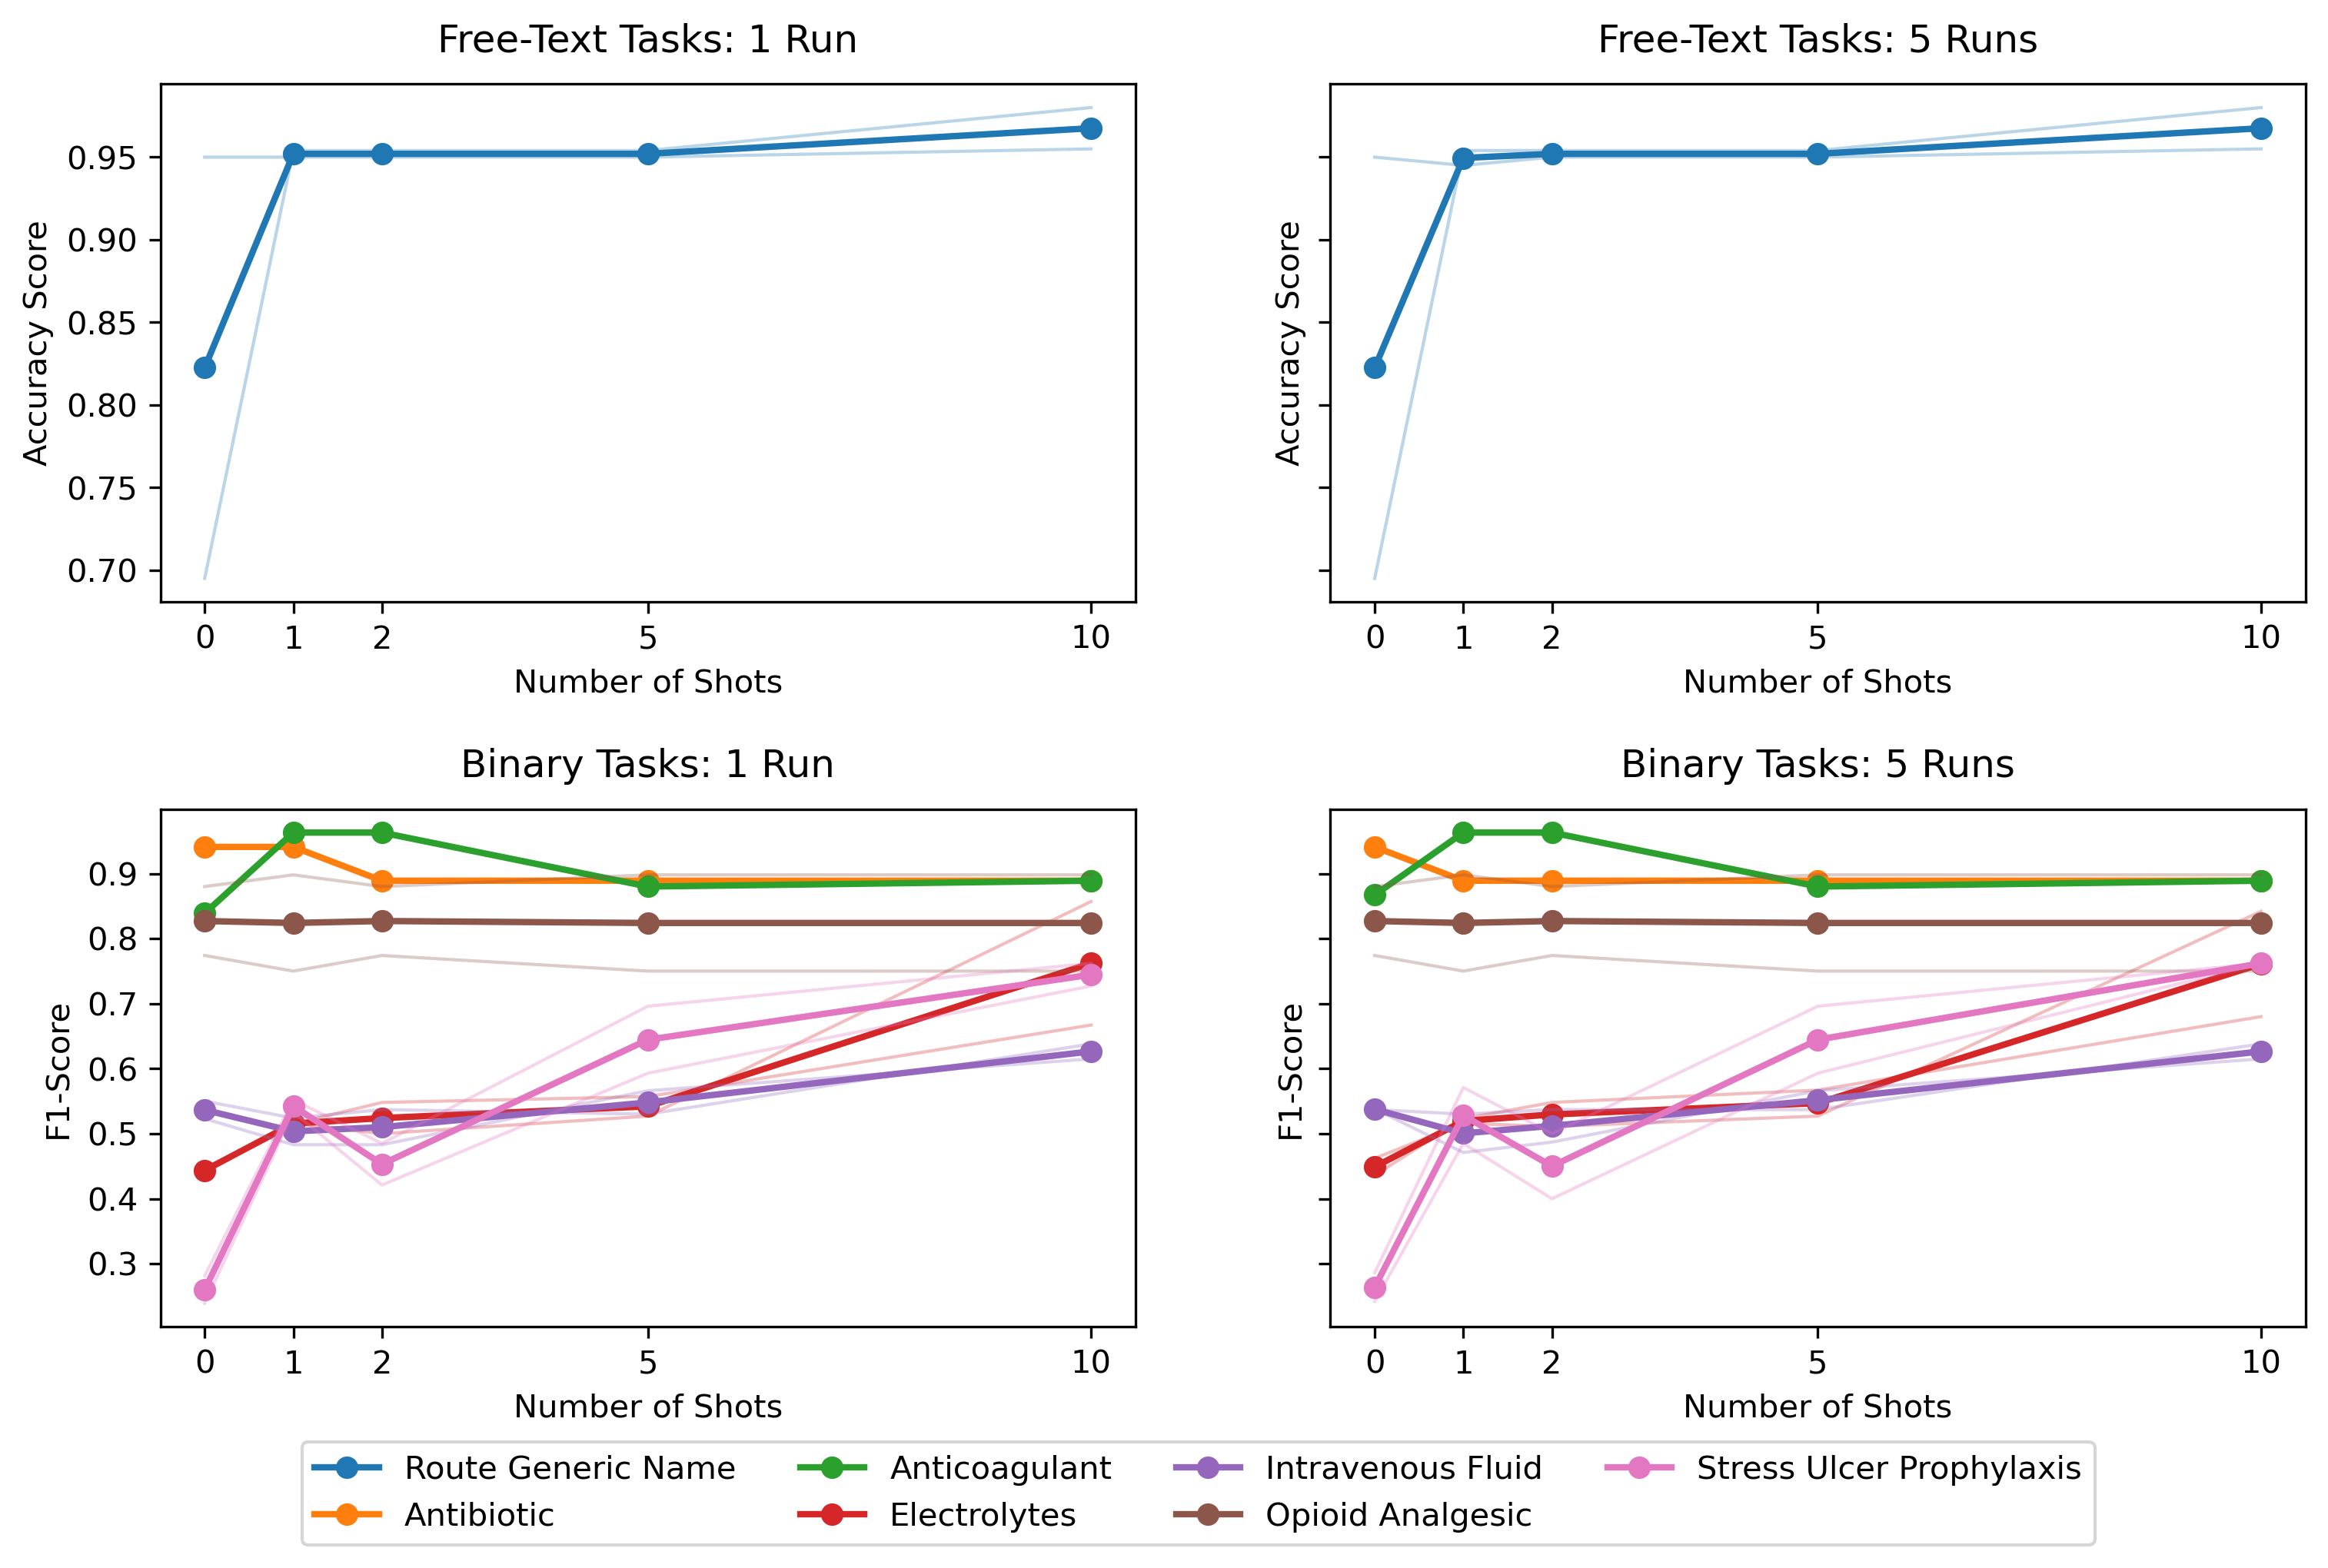

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_df' is your DataFrame
# Define task names for mapping
task_names = {
    "one_hot_antibiotic": "Antibiotic",
    "one_hot_anticoagulant": "Anticoagulant",
    "one_hot_electrolytes": "Electrolytes",
    "one_hot_iv_fluid": "Intravenous Fluid",
    "one_hot_opioid_analgesic": "Opioid Analgesic",
    "one_hot_stress_ulcer_prophylaxis": "Stress Ulcer Prophylaxis",
    # "get_generic_name": "Drug Generic Name",
    "get_generic_route": "Route Generic Name",
}

# Separate tasks into free text and binary tasks
free_text_tasks = [
    # "get_generic_name", 
    "get_generic_route",
    ]
binary_tasks = ["one_hot_antibiotic", "one_hot_anticoagulant", "one_hot_electrolytes",
                "one_hot_iv_fluid", "one_hot_opioid_analgesic", "one_hot_stress_ulcer_prophylaxis"]

# Create a figure with 2x2 subplots with more rectangular aspect
fig, axs = plt.subplots(2, 2, figsize=(12, 7), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.4,}, sharey='row')

# Define the plot parameters
plot_params = [
    ('accuracy_score', 'Free-Text Tasks', 1),
    ('accuracy_score', 'Free-Text Tasks', 5),
    ('f1_score', 'Binary Tasks', 1),
    ('f1_score', 'Binary Tasks', 5),
]

# Get unique shots from the data for x-ticks
unique_shots = sorted(df['n_shots'].unique())

# Define a color map using matplotlib 'tab:' colors
color_cycle = plt.cm.tab10.colors  # 10 unique colors from the tab10 colormap
color_map = {task: color_cycle[i] for i, task in enumerate(free_text_tasks + binary_tasks)}

# Plotting
for (metric, task_type, attempts), ax in zip(plot_params, axs.flatten()):
    if 'Free-Text' in task_type:
        tasks = free_text_tasks
    else:
        tasks = binary_tasks

    for task in tasks:
        group = df[(df['source_file'] == task) & (df['n_attempts'] == attempts)]
        mean_values = group.groupby('n_shots')[metric].mean().reset_index()

        # Scatter plot with connected lines
        ax.plot(mean_values['n_shots'], mean_values[metric], label=task_names[task], marker='o', color=color_map[task], linewidth=2)

        # Plot individual database lines with alpha for transparency
        for db_name, db_group in group.groupby('db'):
            ax.plot(db_group['n_shots'], db_group[metric], alpha=0.3, color=color_map[task], linewidth=1)

    if attempts == 1:
        runs = 'Run'
    else:
        runs = 'Runs'
    ax.set_title(f'{task_type}: {attempts} {runs}', pad=10)
    ax.set_xlabel('Number of Shots')
    ylabel = metric.replace('_', ' ').title()
    if ylabel == 'F1 Score':
        ylabel = 'F1-Score'
    ax.set_ylabel(ylabel)
    ax.set_xticks(unique_shots)

# Add a single legend below the plots
handles, labels = [], []
for ax in axs.flatten():
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -.035))

plt.show()

fig.savefig("plots/figure3.png", bbox_inches="tight")


In [189]:
labels

['Antibiotic',
 'Anticoagulant',
 'Electrolytes',
 'Intravenous Fluid',
 'Opioid Analgesic',
 'Stress Ulcer Prophylaxis']